In [ ]:
## https://www.hse.ie/eng/staff/resources/our-workforce/workforce-reporting/health-sector-employment-report-january-2023.pdf

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [4]:
# Read data from CSV and remove unnecessary columns
cna31 = pd.read_csv('data/cna15again.csv')
cna31.drop(columns=['Statistic', 'Sex', 'UNIT'], inplace=True)
cna31.head()

,Year,All ages
0,1926,2971992
1,1936,2968420
2,1946,2955107
3,1951,2960593
4,1961,2818341


C:\Users\bayan\AppData\Local\Temp\ipykernel_10752\1050341609.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


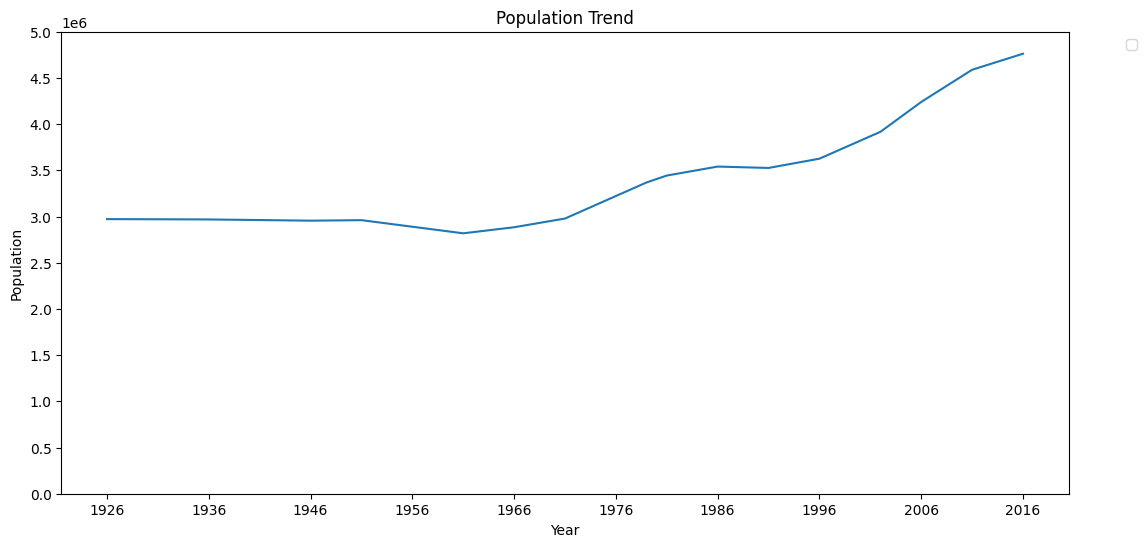

In [5]:
# Data Visualisation

# Visualising population trend for each birthplace
plt.figure(figsize=(13, 6))

# Plotting population by birthplace
# for column in cna31.columns[1:]:
#     plt.plot(cna31['Year'], cna31[column], label=column)

plt.plot(cna31['Year'], cna31['All ages'])
# Custom tick labels to show every 20th year and the final year
x_ticks = [1926, 1936, 1946, 1956, 1966, 1976, 1986, 1996, 2006, 2016]
plt.xticks(x_ticks)
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\bayan\AppData\Local\Temp\ipykernel_22352\3013963915.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


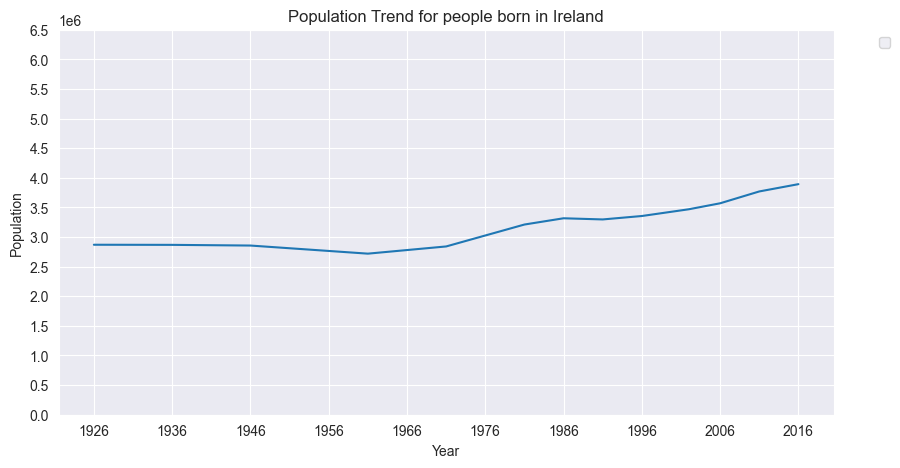

In [18]:
# Read data from CSV and remove unnecessary columns
cna31 = pd.read_csv('../data/cna31again.csv')
# cna31.drop(columns=['Statistic', 'Sex', 'UNIT'], inplace=True)
cna31.head()
cna31['Ireland'] = cna31['Ireland (Republic): County of Enumeration'] + cna31['Other County']
# Data Visualisation

# Visualising population trend for each birthplace
plt.figure(figsize=(10, 5))

# Plotting population by birthplace
# for column in cna31.columns[1:]:
#     plt.plot(cna31['Year'], cna31[column], label=column)

plt.plot(cna31['Year'], cna31['Ireland'])
# Custom tick labels to show every 20th year and the final year
x_ticks = [1926, 1936, 1946, 1956, 1966, 1976, 1986, 1996, 2006, 2016]
plt.xticks(x_ticks)
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for people born in Ireland')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
cna15 = pd.read_csv('../data/CNA15-PopPerYearByAgeGroup.csv')
cna15.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)
cna15.head()

# We will need separate models for each age group
age_groups = np.array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years', '85 years and over'])
models = {}

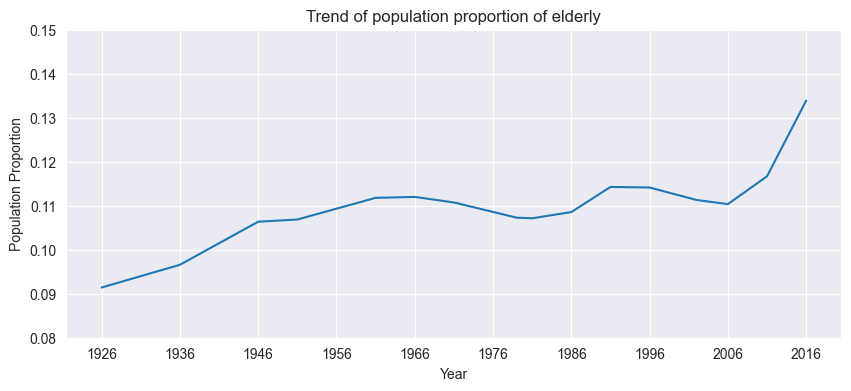

In [16]:
# Data Visualisation
cna15 = pd.read_csv('../data/CNA15-PopPerYearByAgeGroup.csv', index_col='Year')
cna15.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)
proportions = []
cna15['Row_Sum'] = cna15.sum(axis=1)
cna15['Elderly_Sum'] = cna15.iloc[:, -6:-1].sum(axis=1)


for _, row in cna15.iterrows():
    proportion = row['Elderly_Sum'] / row['Row_Sum']
    proportions.append(proportion)

# Visualising population trend for each age group
plt.figure(figsize=(10, 4))

years = cna15.index
plt.plot(years, proportions)

# Custom tick labels to show every 10th year
x_ticks = [1926, 1936, 1946, 1956, 1966, 1976, 1986, 1996, 2006, 2016]
plt.xticks(x_ticks)
plt.ylim(0.08, 0.15)

plt.xlabel('Year')
plt.ylabel('Population Proportion')
plt.title('Trend of population proportion of elderly')
plt.show()

In [27]:
df = pd.read_csv('../data/PopByAgeGroupSupplemented.csv')
print(df.loc[71][-19:].sum())
print(df.loc[74][-19:].sum())
print((df.loc[74][-19:].sum() - df.loc[71][-19:].sum()) / df.loc[74][-19:].sum() * 100)

print(df.loc[71][-5:].sum())
print(df.loc[74][-5].sum())
print((df.loc[74][-5:].sum() - df.loc[71][-5:].sum()) / df.loc[74][-5:].sum() * 100)

5074.699999999999
5380.499999999999
5.683486664808108
747.4
251.3
10.30841233649347


C:\Users\bayan\AppData\Local\Temp\ipykernel_28912\3679384572.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.loc[74][-5].sum())
